# Part I - (Prosper Loan Exploration)
## by (Kosiso Aniebue)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosper-loan-data.csv')

In [4]:
# high-level overview of data shape and composition
pd.set_option("display.max_columns", len(df.columns))
print(df.shape)

(113937, 81)


In [5]:
df.sample(6)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
13289,6CB335863547410004FE661,875641,2013-08-20 14:35:41.750000000,NaN,36,Current,NaN,0.32436,0.2849,0.2749,0.24998,0.1425,0.10748,2.0,E,3.0,1,MS,Sales - Commission,Employed,1.0,False,False,NaN,2013-09-24 11:41:45,660.0,679.0,2000-08-10 00:00:00,6.0,6.0,21.0,6,467.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,18002.0,0.88,2398.0,16.0,1.00,0.0,0.21,"$25,000-49,999",True,3333.333333,F7E93693445461326AB9D75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6,103181,4000,2013-09-26 00:00:00,Q3 2013,3EEA3588027551989C1BCF2,166.52,829.4778,372.53,456.9478,-16.16,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
22374,BDC135319849303416B0974,542327,2011-12-02 06:43:22.143000000,NaN,36,Completed,2012-02-27 00:00:00,0.08882,0.0854,0.0754,0.07540,0.0150,0.06040,7.0,AA,10.0,2,LA,Retail Management,Employed,47.0,True,False,NaN,2011-12-02 06:43:18,820.0,839.0,1993-06-01 00:00:00,2.0,2.0,9.0,1,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.06,8100.0,8.0,1.00,0.0,0.06,"$25,000-49,999",True,3333.333333,5AC43636458005392006999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,27,57059,6000,2011-12-06 00:00:00,Q4 2011,31493533115262911EAEA0E,189.52,6106.3300,6000.00,106.3300,-12.45,0.0,0.0,0.0,0.0,1.0,0,0,0.0,121
36794,99603584733544906394961,845405,2013-07-20 05:36:53.370000000,NaN,36,Current,NaN,0.29537,0.2566,0.2466,0.22540,0.1175,0.10790,3.0,D,2.0,1,PA,Professional,Employed,288.0,True,False,NaN,2013-07-20 05:36:44,760.0,779.0,1977-10-01 00:00:00,14.0,13.0,39.0,10,803.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,28184.0,0.69,12272.0,36.0,1.00,3.0,0.13,"$100,000+",True,10416.666667,81E53688595737102B9BF1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,7,98119,2000,2013-08-05 00:00:00,Q3 2013,75683584559750708147990,80.22,481.3200,235.01,246.3100,-9.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,15
35434,031F3553497370484E59D40,619857,2012-08-03 11:37:48.003000000,NaN,60,Current,NaN,0.15936,0.1364,0.1264,0.12590,0.0249,0.10100,6.0,A,9.0,1,NC,Professional,Employed,15.0,True,False,NaN,2012-08-03 11:37:43,740.0,759.0,1990-10-01 00:00:00,19.0,17.0,68.0,10,617.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,21484.0,0.44,26201.0,52.0,0.86,0.0,0.18,"$100,000+",True,16666.666667,ECE33657766757233734E77,3.0,24.0,24.0,0.0,0.0,19000.0,9823.29,-18.0,0,NaN,19,71763,13500,2012-08-08 00:00:00,Q3 2012,21723396062375320B88338,311.61,5608.9800,3132.88,2476.1000,-181.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,242
42014,46053582297486023FEA738,812979,2013-06-18 07:29:44.920000000,NaN,36,Current,NaN,0.19236,0.1559,0.1459,0.1

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
loans = df.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 
                       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                      'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 
                      'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',
                      'MonthlyLoanPayment', 'Investors']]

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  IncomeRange                113937 non-null  object 
 13  StatedMonthlyIncome        11

In [8]:
loans.sample(7)

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
33332,2012-04-11 19:04:01.620000000,36,Completed,2012-05-07 00:00:00,0.35797,0.3177,HR,3.0,19,IN,Other,Other,"$1-24,999",1666.666667,4000,2012-04-20 00:00:00,173.71,76
86626,2013-10-10 08:26:35.750000000,60,Current,NaN,0.28078,0.2549,E,4.0,1,NC,Professional,Employed,"$50,000-74,999",4666.666667,10000,2013-12-09 00:00:00,296.39,136
96395,2012-09-17 11:18:46.270000000,60,Current,NaN,0.24682,0.2218,C,8.0,3,TN,Other,Employed,"$25,000-49,999",3583.333333,15000,2012-09-26 00:00:00,415.82,148
38552,2011-02-24 10:55:10.920000000,36,FinalPaymentInProgress,NaN,0.29510,0.2599,D,6.0,1,VA,Food Service Management,Employed,"$25,000-49,999",3500.000000,7500,2011-03-10 00:00:00,302.14,148
87709,2006-06-02 03:34:22.083000000,36,Defaulted,2007-11-10 00:00:00,0.29274,0.2850,NaN,NaN,0,GA,NaN,NaN,Not displayed,4000.000000,3050,2006-06-12 00:00:00,126.98,32
1572,2012-07-02 07:01:51.453000000,60,Current,NaN,0.24702,0.2220,C,4.0,2,MD,Analyst,Employed,"$100,000+",12250.000000,10000,2012-07-10 00:00:00,277.33,145
36212,2012-08-03 20:46:14.013000000,60,Current,NaN,0.34614,0.3185,E,8.0,16,NY,Food Service,Employed,"$25,000-49,999",2583.333333,2500,2012-08-10 00:00:00,83.75,6


In [9]:
#Adjust Datetime columns
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate']) 
loans['ClosedDate'] = pd.to_datetime(loans['ClosedDate'])
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   ProsperRating (Alpha)      84853 non-null   object        
 7   ProsperScore               84853 non-null   float64       
 8   ListingCategory (numeric)  113937 non-null  int64         
 9   BorrowerState              108422 non-null  object        
 10  Occupation                 110349 non-null  object        
 11  EmploymentStatus           111682 non-null  object  

In [10]:
# Convert ProsperRating, IncomeRange & EmployementStatus to ordinal categorical 
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                   'EmploymentStatus':['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [73]:
loans['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [74]:
loans['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [75]:
loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

### What is the structure of your dataset?

> The dataset contains 113937 rows and 22 columns. Most of the columns are numeric but we also have categorical variables(both ordinal and nominal) and datetime variables.

### What is/are the main feature(s) of interest in your dataset?

> BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan and what features are best for predicting it

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that 'Monthly Income', 'Term (lenght of the loan)' will have an effect on the total loan amount. 'Employement Status' may also have an effect.

## Univariate Exploration

> I will start with the most important features: Borrower APR , Prosper Score and Loan Original Amount


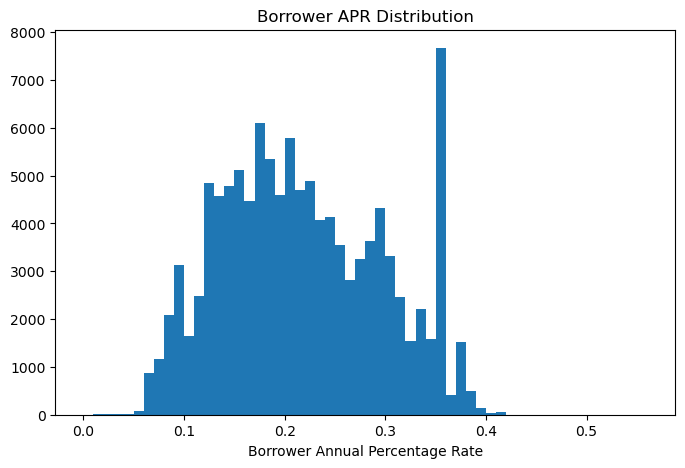

In [76]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loans.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower Annual Percentage Rate');

> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

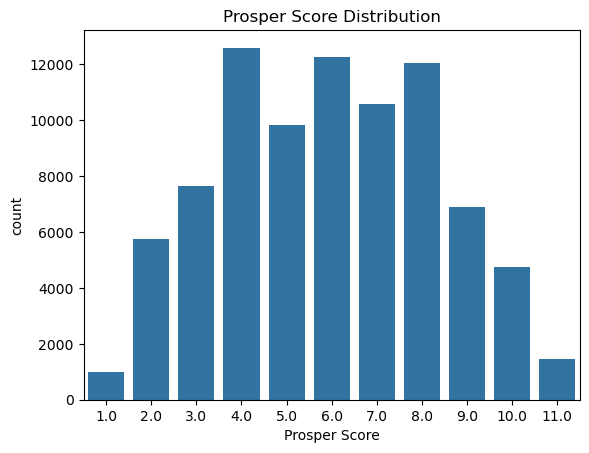

In [28]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

> This is normally distributed with values 4, 6 & 8 being the most common

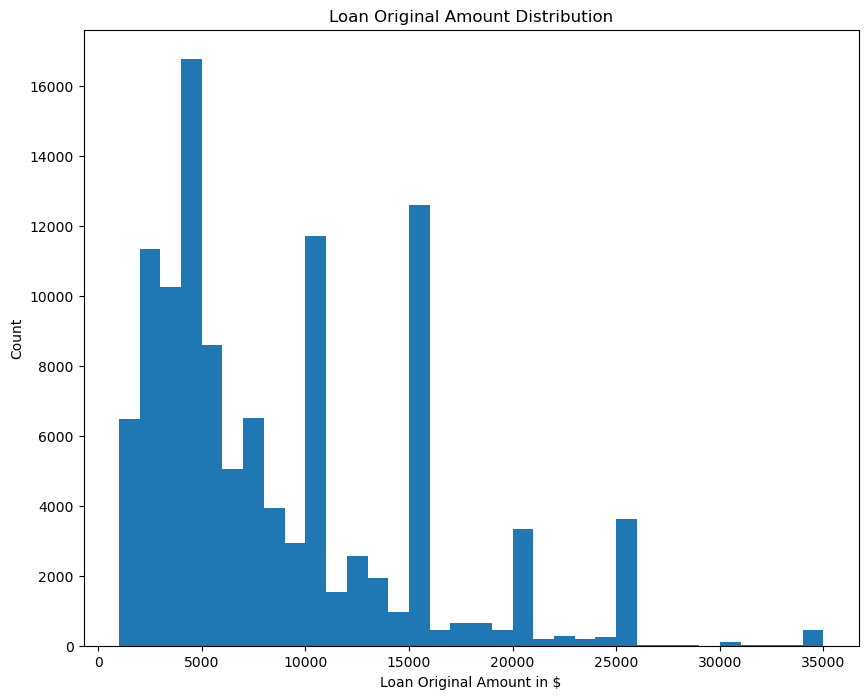

In [77]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(loans['LoanOriginalAmount'].min(), loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

> this is skewed to the right. Using log scale to see it better

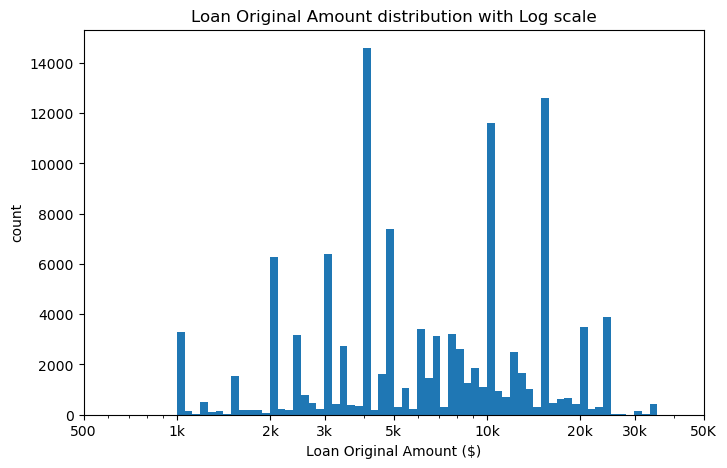

In [78]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

> The highest value for original loan amount is between 3K and 5K. There is also an increase in amount between 10K and 20K


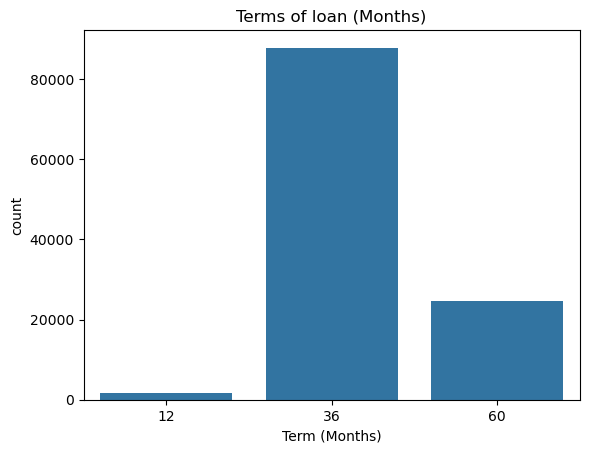

In [79]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

> So we can see that terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months) with most of the loans having a 3-year term

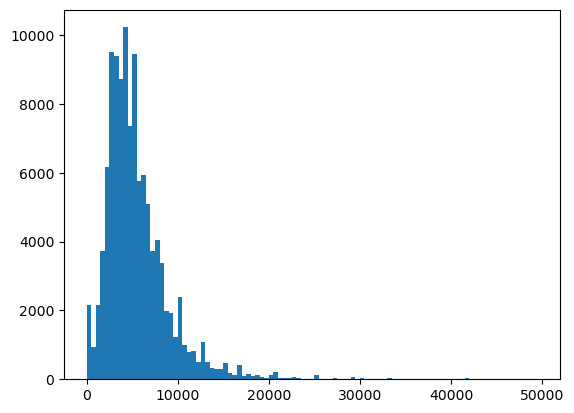

In [80]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins=bins_smi);

> The distribution of 'StatedMonthlyIncome' is heavily skewed to the right, and shows that most of the stated monthly incomes are less than 30k

> A look at plots of Term, Prosper rating and Employment status

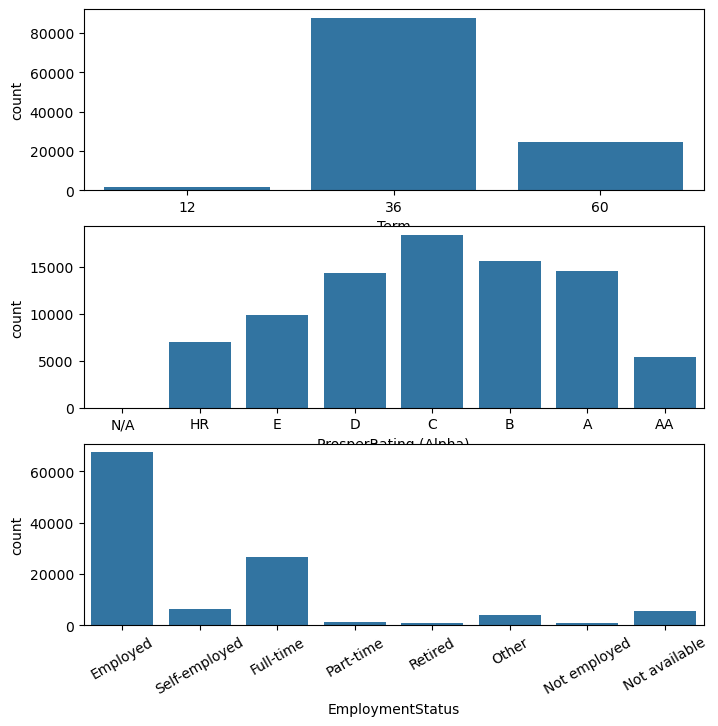

In [81]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

> The length of most of the loans are 36 months. 
> The ratings of most of the borrowers are among D to A. 
> Most of borrowers are employed and full-time.

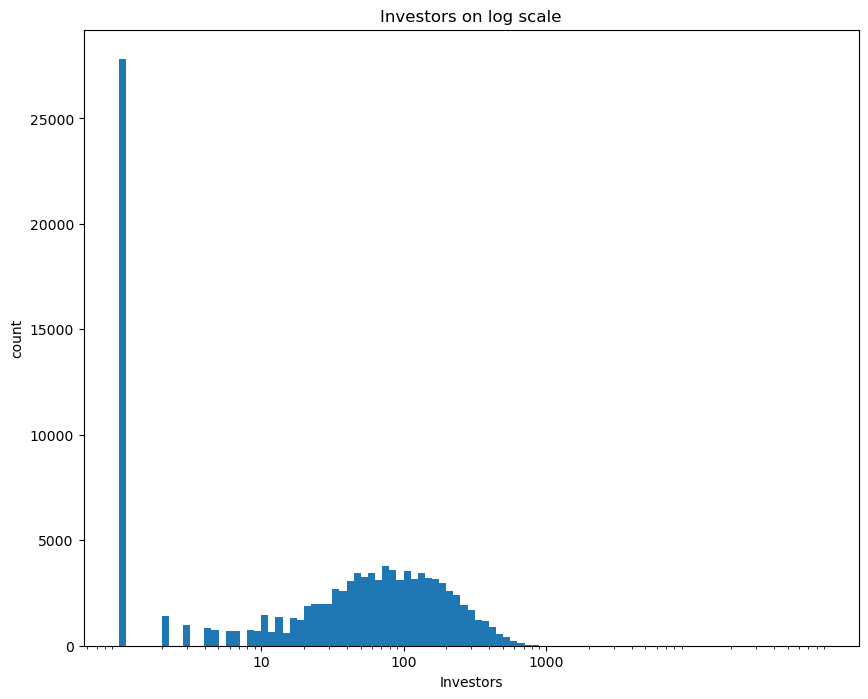

In [82]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')
plt.show()

> Most loans have about 100 investors on average

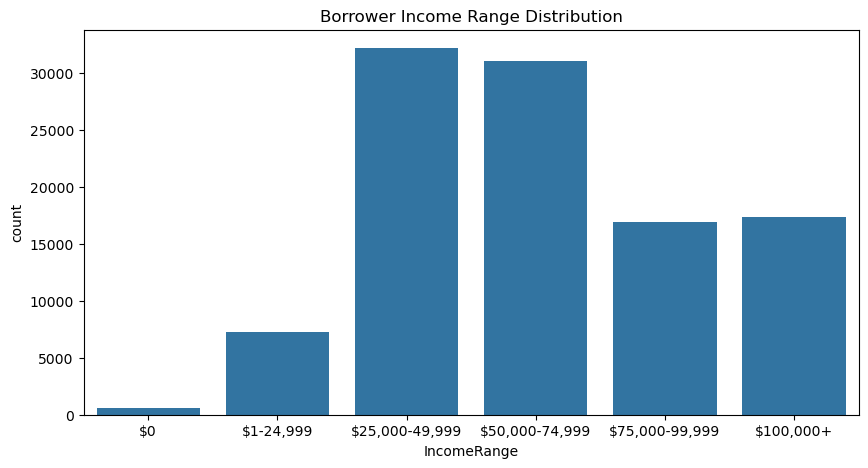

In [83]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=loans,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution');

> Most loans are taken by those with income range between the $25,000-$49,999 followed closely by those in the $50,000-$74,999 range
> It will be safe to say that most loans are taken by people with income between $25,000 and $74,999

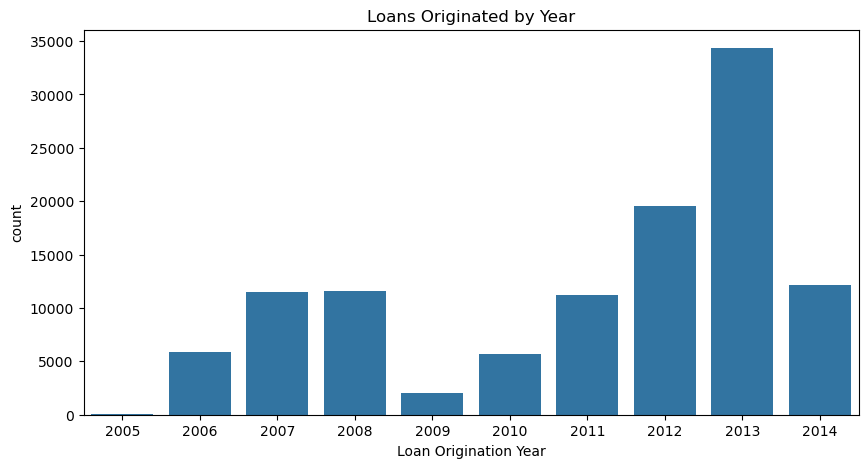

In [84]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=loans,x=loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

> There is a significant drop in 2009 in loans but it started to increase gradually and reached peaked in 2013

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4.

> Loan Original Amount distribution is right skewed and I performed log transformation on it to interpret the visualization. I also did the log transformation to these variables: Monthly Loan Payment, Investors.

> Year 2013 had the highest loan creation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income is heavily skewed to the right. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. 
> Most borrowers with greater than 100k monthly income only loan less than 5k dollars. 
So, the very large stated monthly income may need rechecking. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [86]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',]

categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'IncomeRange']

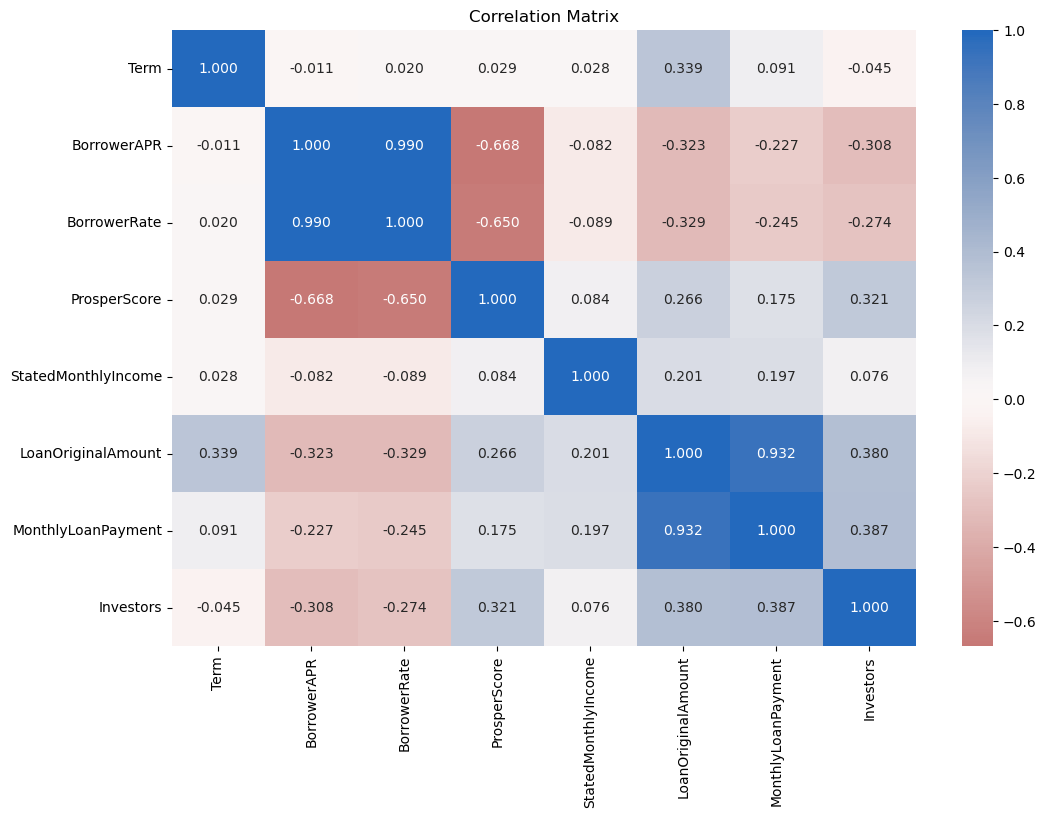

In [87]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(loans[numeric_variables].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

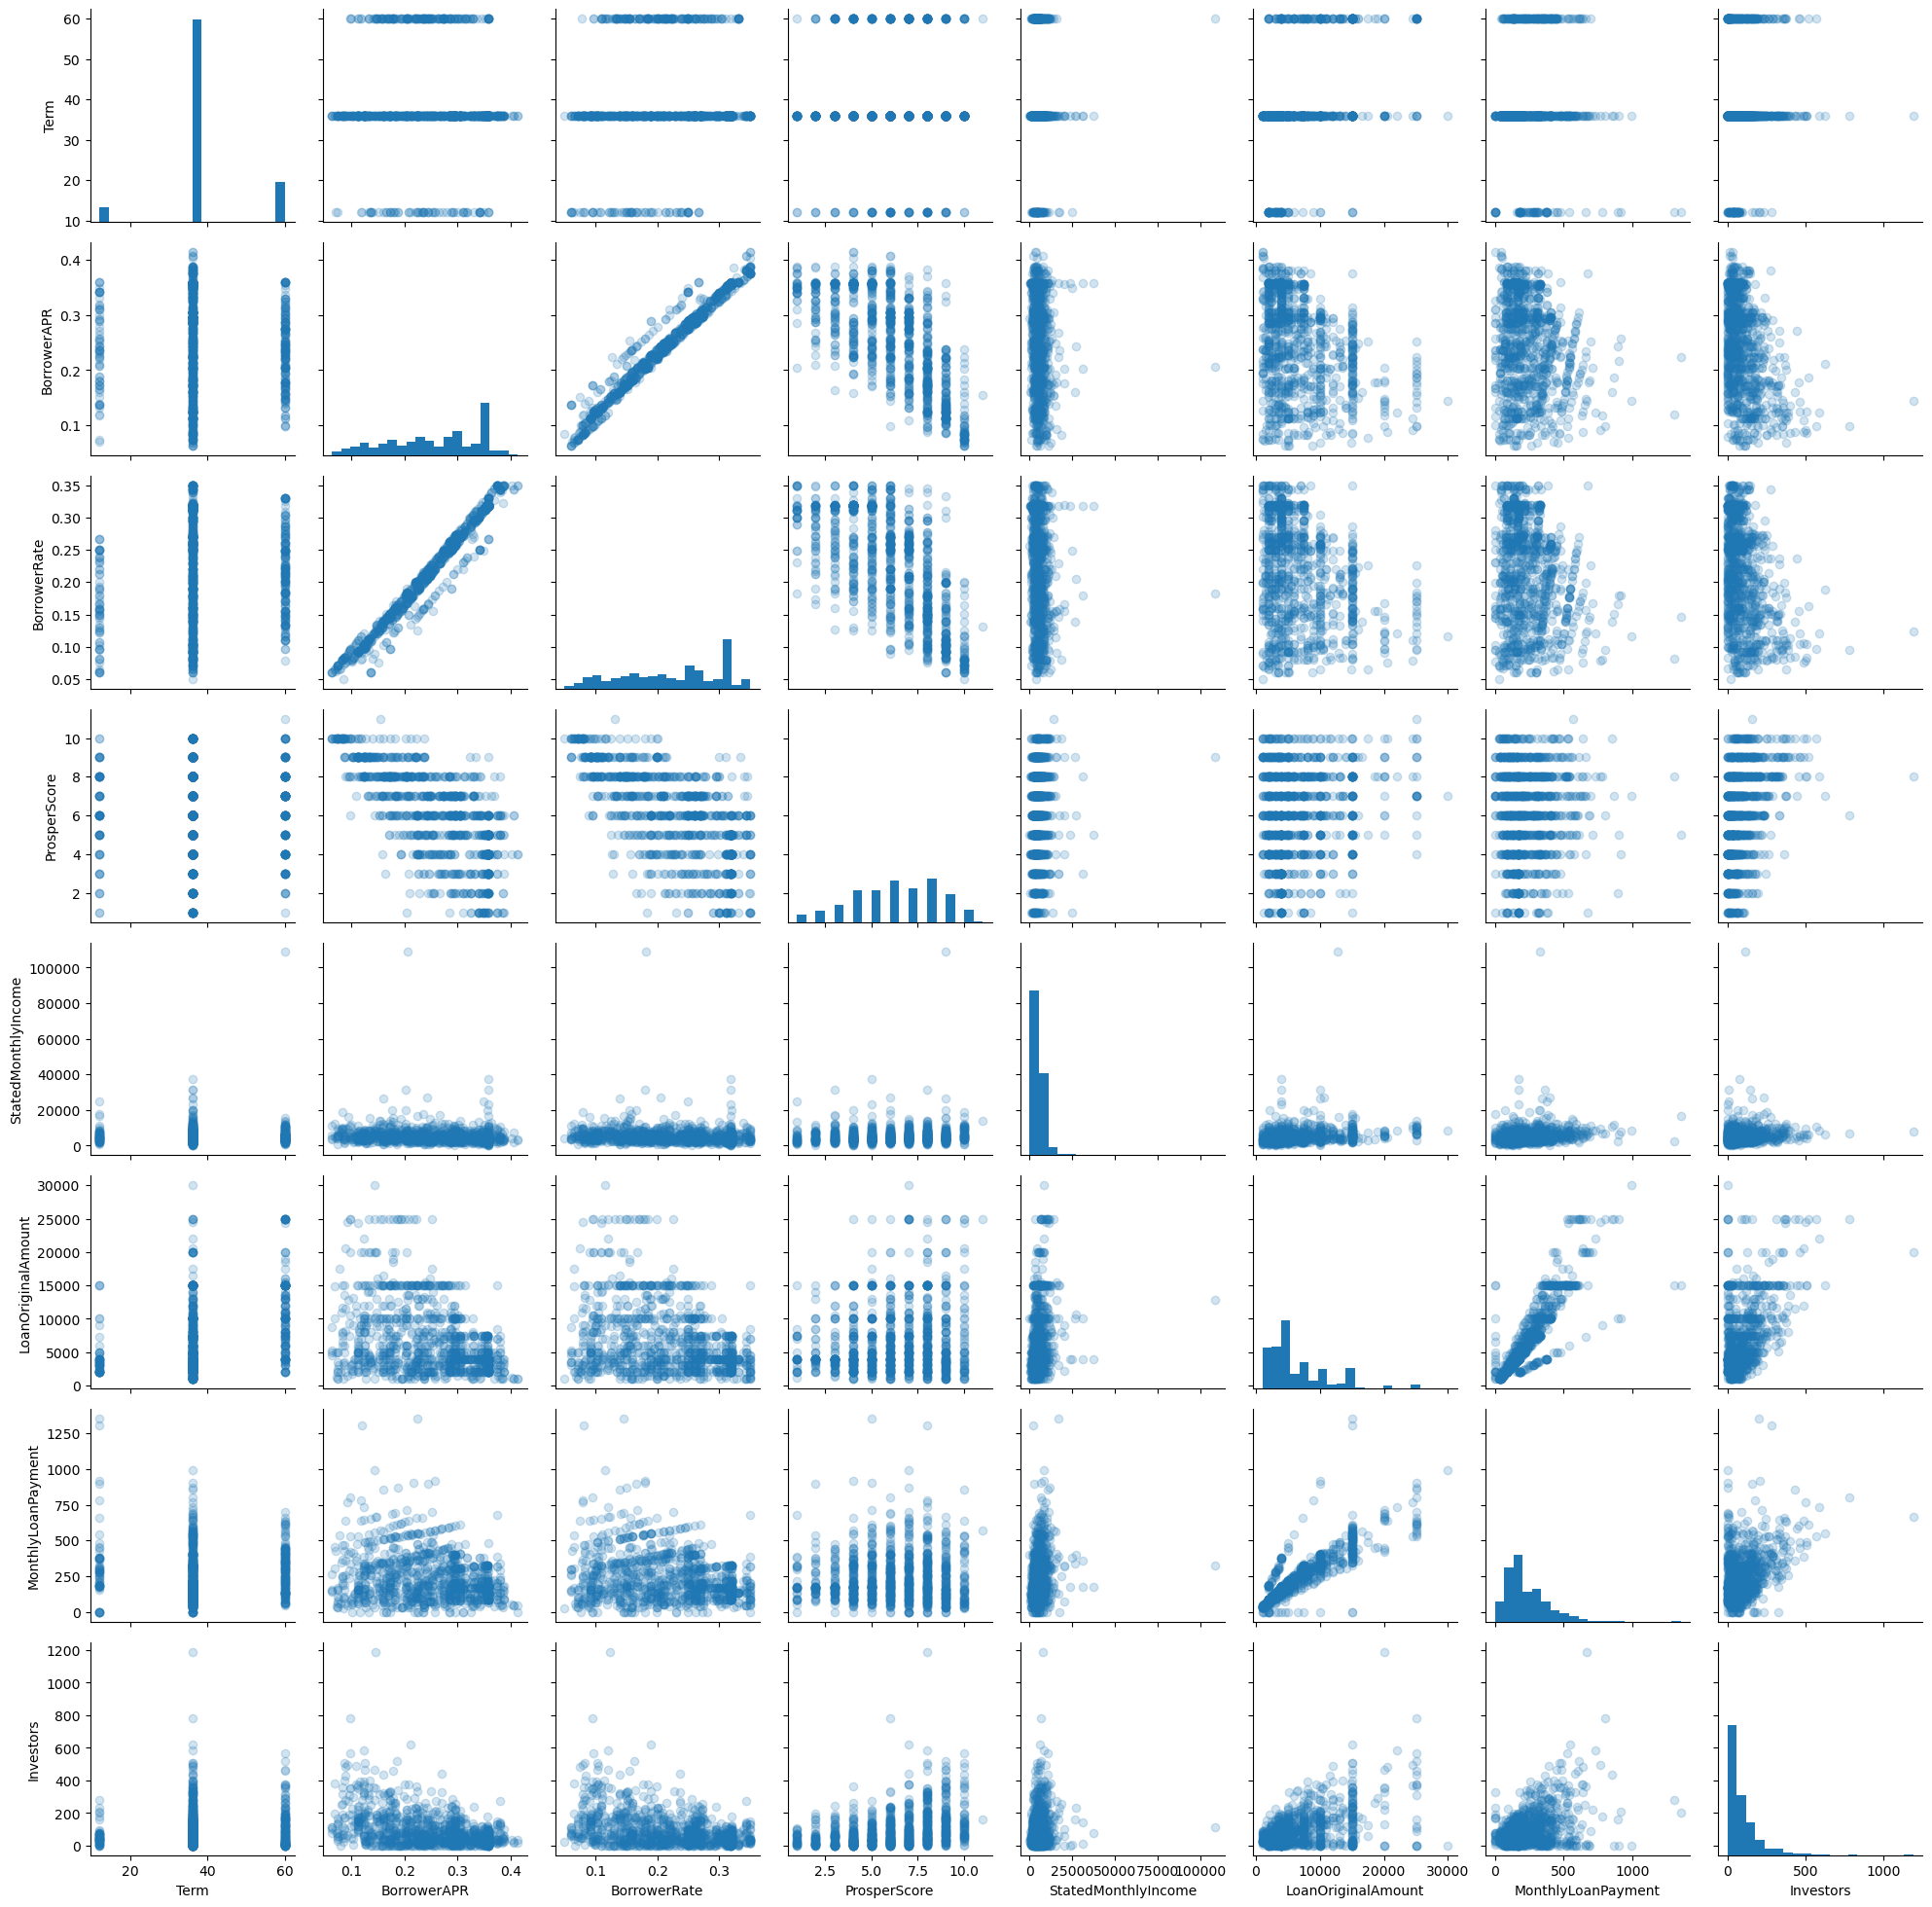

In [88]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loans_samp = loans.sample(5000)
g = sb.PairGrid(data = loans_samp.dropna(), vars = numeric_variables)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

> The correlation coefficient of borrower APR and loan original amount is -ve, the scatter plot also shows that these two variables are negatively correlated, which suggests that is the more the loan amount, the lower the APR. 

> The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

> Strong positive correlations between Lender yield and Borrower APR. Prosper Score and Prosper Rating are also positive correlation. Credit Score upper range has also some weak +ve correlation with prosper score.


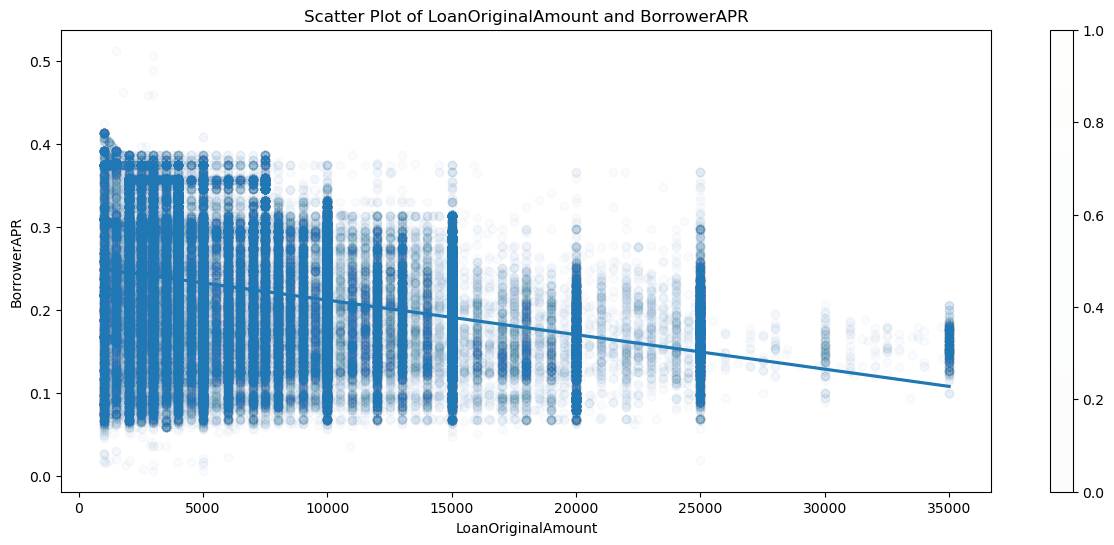

In [12]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.scatter(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

> This shows negative relationship between loan original amount and borrower apr, it means that large loans incur less annual interest rate from the borrower.

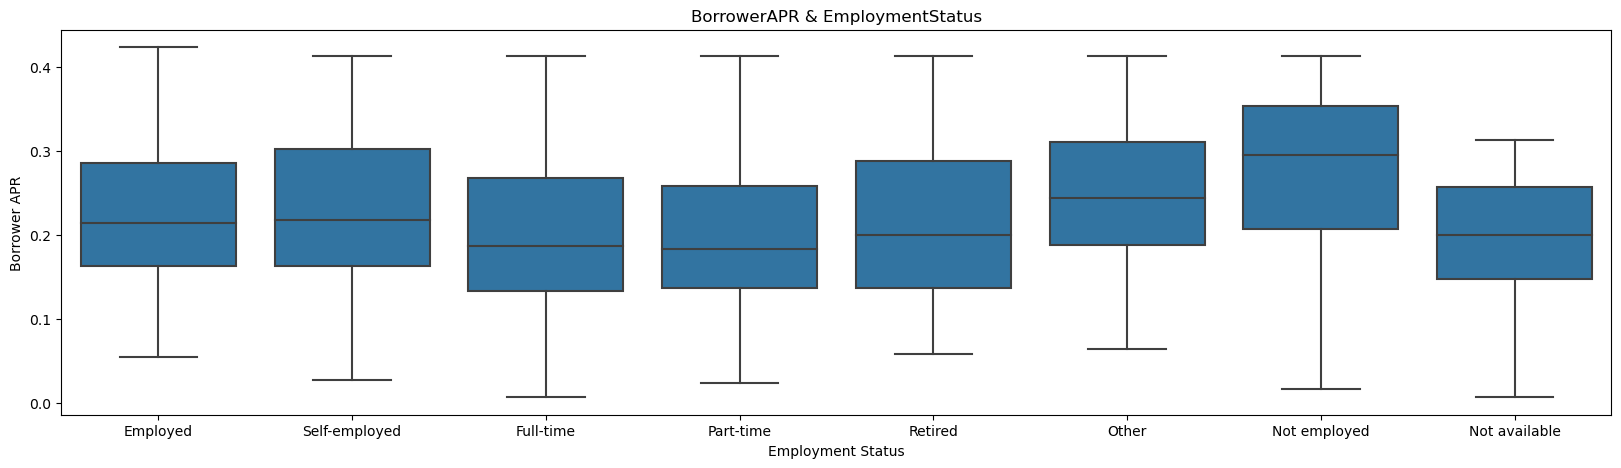

In [90]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

> Employed people have lower APR than not employed

> A look at relationships between Term, ProsperRating (Alpha) and EmploymentStatus

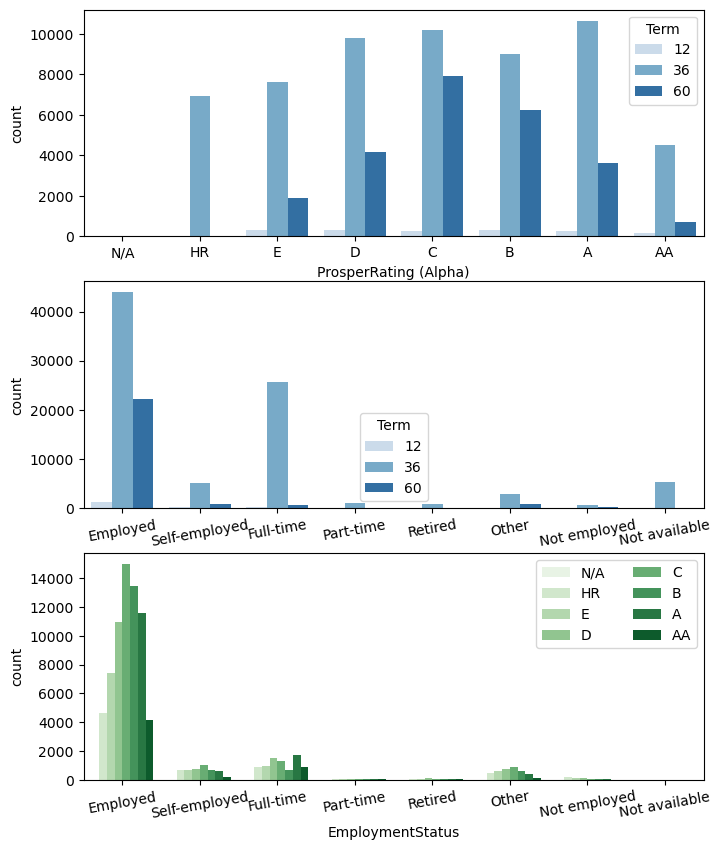

In [62]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

> The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables.

> There is a interaction between Term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. 

> There is only 36 months loans for HR rating borrowers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

> People who are not employed receive high interest rate compared to the employed

> The higher the income, the lower the interest rate


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could borrow more money which almost always translates to better rating.

> There is also an interaction between Prosper rating and Term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

> I plan to explore the how Prosper rating and Term intersect with the relationship between Borrower APR and Loan Original Amount

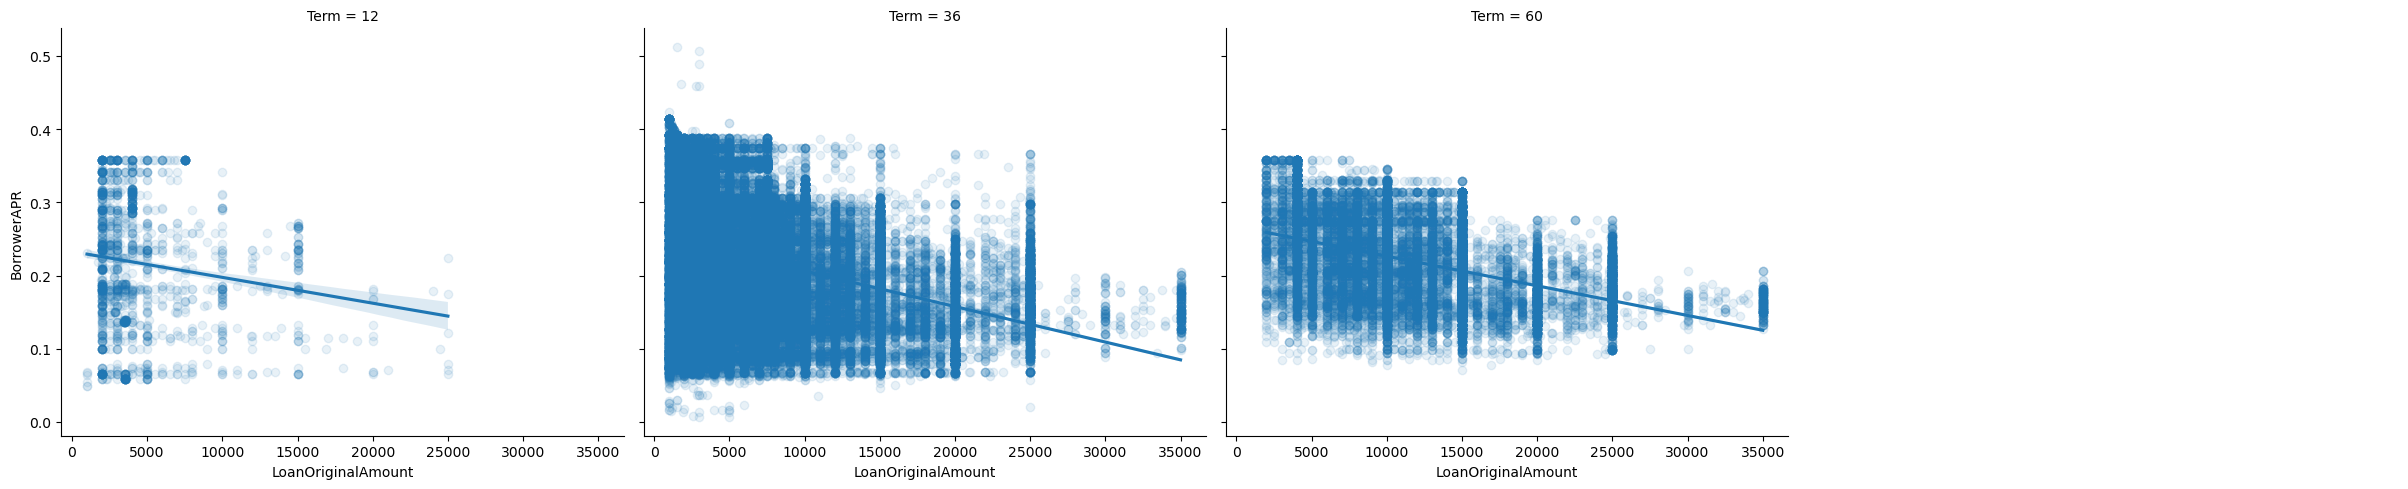

In [65]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loans, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> It appears Term doesn't have effect on relationship of APR and loan amount

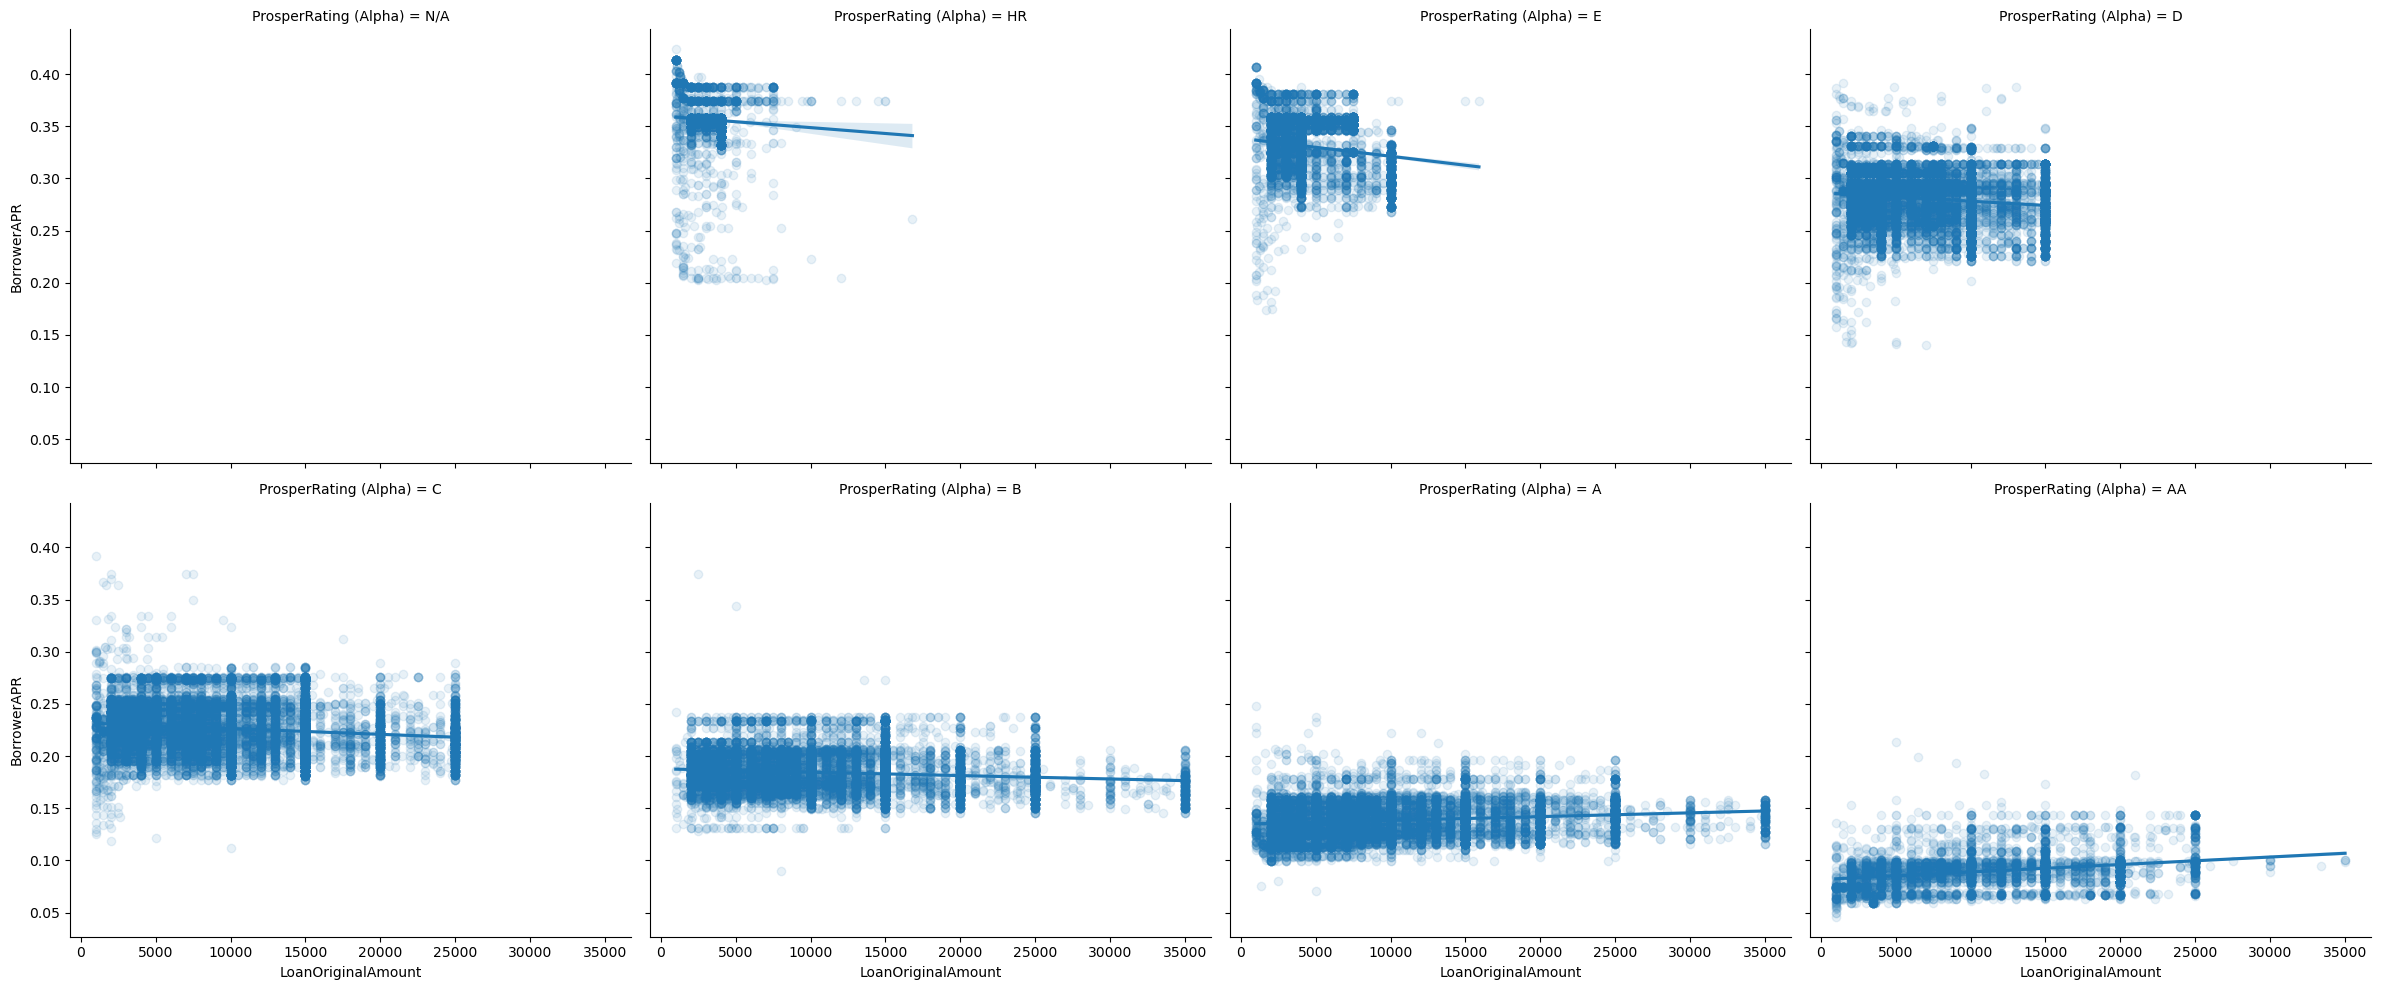

In [66]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loans, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> The loan amount increases with better rating while the borrower APR decreases with better rating. 

Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may be because people with A or AA ratings tend to borrow more money ( or allowed to borrow more money), but increasing APR could prevent them borrow even more and maximize the profit.

> But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

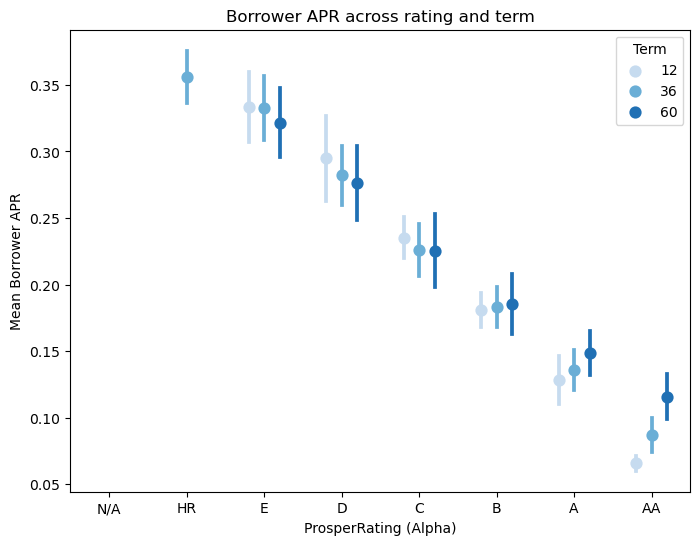

In [67]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

> A look at the rating and term effects on stated monthly income and loan original amount variables

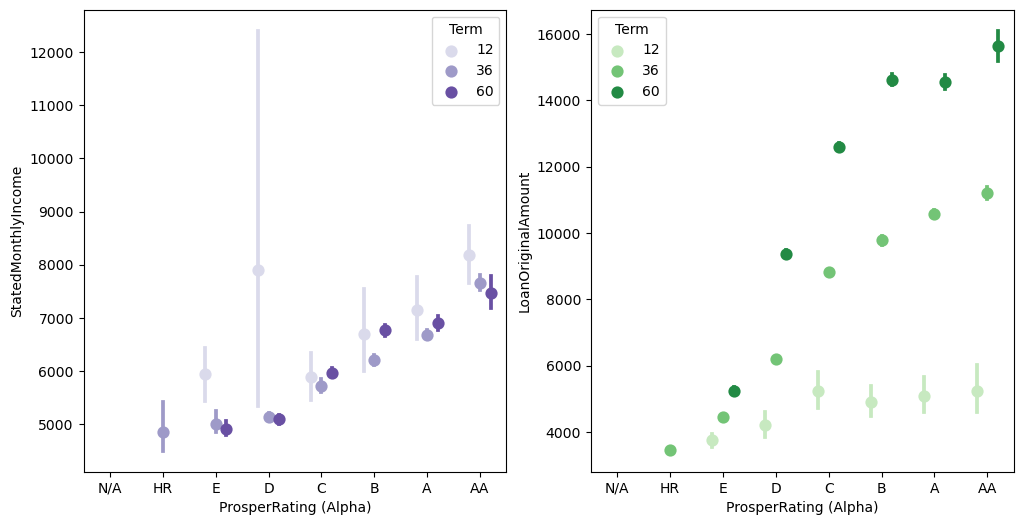

In [68]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

> For loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. Then the rating and term effects on loan amount, shows that with better Prosper rating, the loan amount of all three terms increases, the increase of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. 

> Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.